In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_json("/Users/davidli/Documents/asu/cis509/assignment1/political_orientation_data.json",lines=True)

In [6]:
len(df)

5000

In [5]:
review_corpus = [] # store all reviews here so that we can fit the vectorizer with this dataset
y = []
for index, row in df.iterrows():
    review_text = row['text'] 
    if row['label'] == "Liberal":
        label = 1 # positive
    else:
        label = 0 # negative
    review_corpus.append(review_text)
    y.append(label)
vectorizer = TfidfVectorizer(max_features=10000) # the value of max_features is dependent on how you design your model
vectorizer.fit(review_corpus) # fit the vectorizer with the entire dataset
# once we fitted the vectorizer, we use it for converting raw text (review) into vectors
vectorized_review = vectorizer.transform(review_corpus)

TfidfVectorizer(max_features=10000)

In [6]:
X, Y = vectorized_review.toarray(), np.asarray(y)

In [7]:
input_layer = tf.keras.Input(shape=10000, name="input_layer")
hidden_layer_1 = tf.keras.layers.Dense(units=5000, activation="relu", name="hidden-layer-ReLU-1")(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(units=2500, activation="relu", name="hidden-layer-ReLU-2")(hidden_layer_1)
output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")(hidden_layer_2) 

model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="classifier")
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=[tf.keras.metrics.BinaryAccuracy(name="accuracy")])

Metal device set to: Apple M1 Pro


2022-03-24 21:54:00.153900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-24 21:54:00.154193: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10000)]           0         
                                                                 
 hidden-layer-ReLU-1 (Dense)  (None, 5000)             50005000  
                                                                 
 hidden-layer-ReLU-2 (Dense)  (None, 2500)             12502500  
                                                                 
 output_layer (Dense)        (None, 1)                 2501      
                                                                 
Total params: 62,510,001
Trainable params: 62,510,001
Non-trainable params: 0
_________________________________________________________________


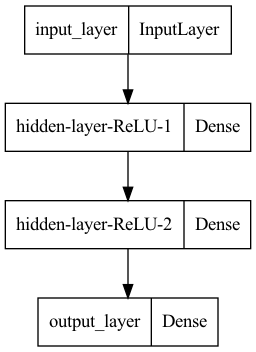

In [8]:
model.summary()
tf.keras.utils.plot_model(model)

In [12]:
filepath = "/Users/davidli/Documents/asu/cis509/assignment1/"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True, monitor="val_accuracy", mode="max", verbose=2)
model.fit(x=X, y=Y, batch_size = 8, validation_split=0.25, epochs=30, callbacks=cp_callback)

Epoch 1/30
469/469 [==============================] - ETA: 0s - loss: 0.5781 - accuracy: 0.6717
Epoch 00001: val_accuracy improved from -inf to 0.67840, saving model to /Users/davidli/Documents/asu/cis509/assignment1/
INFO:tensorflow:Assets written to: /Users/davidli/Documents/asu/cis509/assignment1/assets
469/469 [==============================] - 8s 16ms/step - loss: 0.5781 - accuracy: 0.6717 - val_loss: 0.6092 - val_accuracy: 0.6784
Epoch 2/30
468/469 [============================>.] - ETA: 0s - loss: 0.5603 - accuracy: 0.6982
Epoch 00002: val_accuracy did not improve from 0.67840
469/469 [==============================] - 7s 14ms/step - loss: 0.5602 - accuracy: 0.6984 - val_loss: 0.5984 - val_accuracy: 0.6712
Epoch 3/30
469/469 [==============================] - ETA: 0s - loss: 0.5398 - accuracy: 0.7179
Epoch 00003: val_accuracy improved from 0.67840 to 0.68400, saving model to /Users/davidli/Documents/asu/cis509/assignment1/
INFO:tensorflow:Assets written to: /Users/davidli/Docume

Epoch 25/30
468/469 [============================>.] - ETA: 0s - loss: 0.0643 - accuracy: 0.9947
Epoch 00025: val_accuracy did not improve from 0.74160
469/469 [==============================] - 7s 14ms/step - loss: 0.0643 - accuracy: 0.9947 - val_loss: 0.7014 - val_accuracy: 0.7280
Epoch 26/30
466/469 [============================>.] - ETA: 0s - loss: 0.0580 - accuracy: 0.9944
Epoch 00026: val_accuracy did not improve from 0.74160
469/469 [==============================] - 7s 14ms/step - loss: 0.0580 - accuracy: 0.9941 - val_loss: 0.7057 - val_accuracy: 0.7160
Epoch 27/30
467/469 [============================>.] - ETA: 0s - loss: 0.0513 - accuracy: 0.9957
Epoch 00027: val_accuracy did not improve from 0.74160
469/469 [==============================] - 7s 14ms/step - loss: 0.0513 - accuracy: 0.9957 - val_loss: 0.7384 - val_accuracy: 0.7304
Epoch 28/30
467/469 [============================>.] - ETA: 0s - loss: 0.0469 - accuracy: 0.9965
Epoch 00028: val_accuracy did not improve from 0.74

In [14]:
new_model = tf.keras.models.load_model("/Users/davidli/Documents/asu/cis509/assignment1/")
new_model.summary()

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10000)]           0         
                                                                 
 hidden-layer-ReLU-1 (Dense)  (None, 5000)             50005000  
                                                                 
 hidden-layer-ReLU-2 (Dense)  (None, 2500)             12502500  
                                                                 
 output_layer (Dense)        (None, 1)                 2501      
                                                                 
Total params: 62,510,001
Trainable params: 62,510,001
Non-trainable params: 0
_________________________________________________________________


In [22]:
test = ["Anarcho-capitalism, in my opinion, is a doctrinal system which, if ever implemented, would lead to forms of tyranny and oppression that have few counterparts in human history.","Biden's Response to Putin's Invasion of Ukraine Has Been His Finest Moment"]

In [28]:
vectorized_new_data = vectorizer.transform(test)
test_x = vectorized_new_data.toarray()
np.rint(new_model.predict(test_x))


array([[1.],
       [0.]], dtype=float32)